In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the file into a dataframe and making a copy

df_main = pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df = df_main.copy()
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Exploratory Data Analysis

In [4]:
df.shape

(303, 14)

In [5]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#Checking for missing data

missing_data = df.isnull()

missing_data.sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

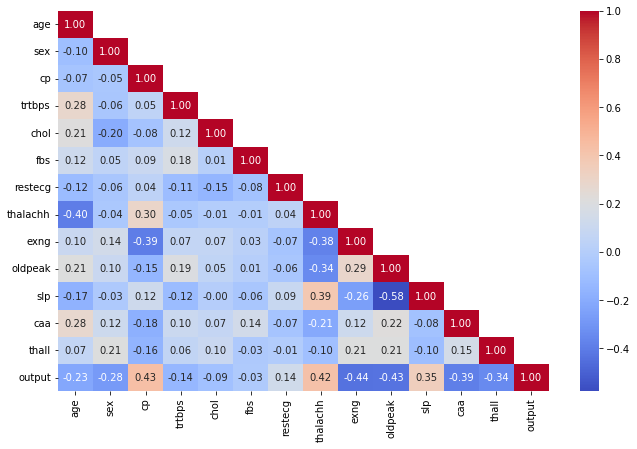

In [12]:
# Correlation heatmap

hmap_mask = np.triu(df.corr(), k=1)
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), mask=hmap_mask, annot = True, fmt=".2f", cmap='coolwarm')

In [13]:
#Extracting features

X = df.drop('output', axis = 1)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
#Extracting labels

y = df.iloc[:,-1:]
y.head()

,output
0,1
1,1
2,1
3,1
4,1


In [15]:
#Identifying continuous and categorical data columns

cat_cols = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
cont_cols = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [21]:
X.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall'],
      dtype='object')

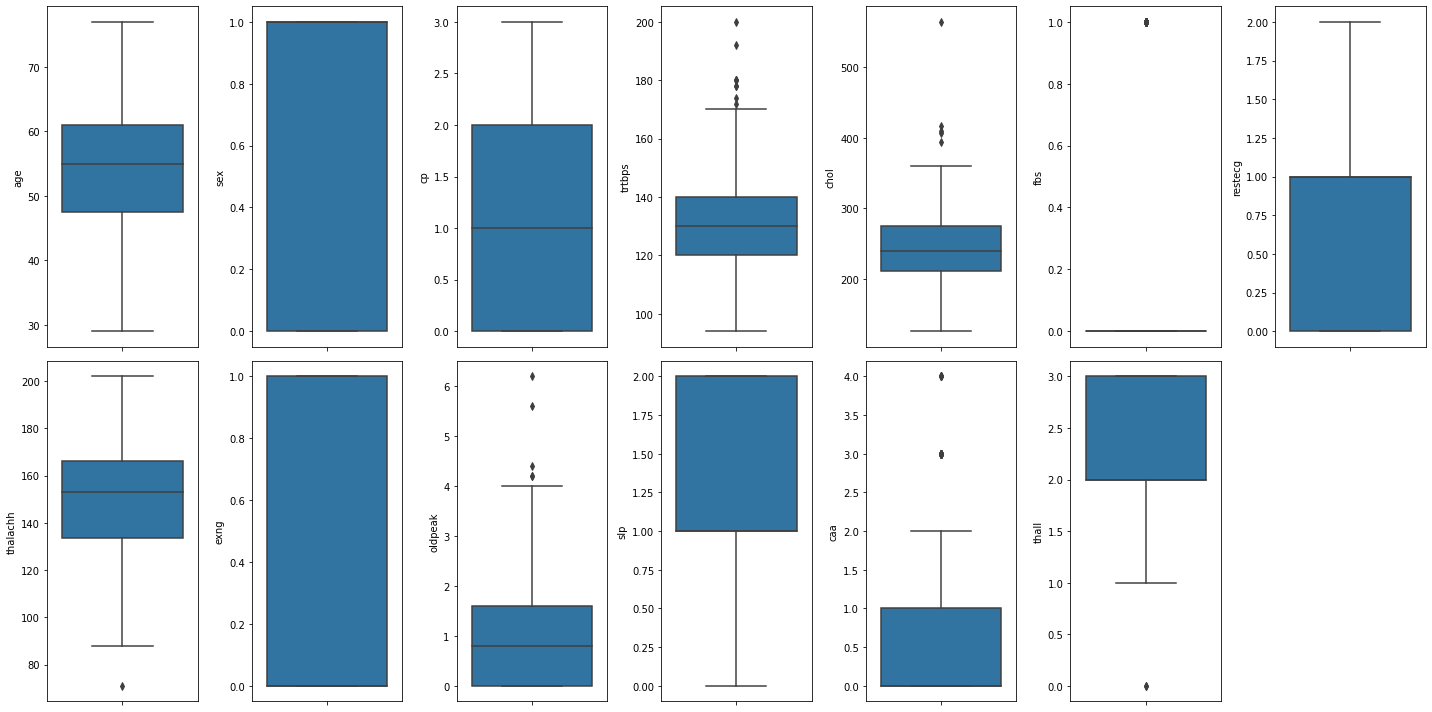

In [23]:
# Visualizing features and checking for outliers 

fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col in list(X.columns):
    sns.boxplot(y=col, data=X, ax=ax[index])
    index += 1

fig.delaxes(ax[13]) 
plt.draw()
plt.tight_layout()

# Normalising and splitting the data

In [24]:
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [25]:
st_scaler = StandardScaler()
X_norm=X.copy()
X_norm[cont_cols]=pd.DataFrame(st_scaler.fit_transform(X_norm[cont_cols]), columns=[cont_cols])
X_norm.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 65)

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
#Creating model object
model_lgr = LogisticRegression()

#Training the model
model_lgr.fit(X_train, y_train)

#Prediction
y_lgr = model_lgr.predict(X_test)

#Accuracy
acc_lgr = round(accuracy_score(y_test, y_lgr),5)*100

print("Accuracy with logistic regression is: " + str(acc_lgr) + " %")

Accuracy with logistic regression is: 91.803 %


# XGBoost Classifier

In [29]:
from xgboost import XGBClassifier

In [35]:
#Creating model object
model_xgb = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=25)

#Training the model
model_xgb.fit(X_train, y_train)

#Prediction
y_xgb = model_xgb.predict(X_test)

#Accuracy
acc_xgb = round(accuracy_score(y_test, y_xgb),5)*100

print("\n\nAccuracy with XGBoost is: " + str(acc_xgb) + " %")

[14:18:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy with XGBoost is: 95.082 %


# Support Vector Machines

In [36]:
from sklearn.svm import SVC

In [37]:
#Creating model object
model_svm=SVC(kernel="rbf")

#Training the model
model_svm.fit(X_train,y_train)

#Prediction
y_svm=model_svm.predict(X_test)

#Accuracy
acc_svm = round(accuracy_score(y_test, y_svm),5)*100


print("Accuracy with SVM is: " + str(acc_svm) + " %")

Accuracy with SVM is: 91.803 %


# Summary of results

In [42]:
Acc_df = pd.DataFrame(index=['Logistic Regression', 'XGBoost', 'SVM'], columns=['Accuracy [%]'])

In [ ]:
Acc_df['Accuracy [%]']=[acc_lgr, acc_xgb, acc_svm]
Acc_df

# Conclusion

#### Looks like the most realistic accuracy one can achieve with this dataset is 91.803%.